# Bivariate Analysis

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

In [16]:
import pandas as pd
from os import chdir
chdir("G:\Files")
A=pd.read_csv("Cars93.csv")

# Preview

In [17]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Separate columbns that we need for analysis

In [19]:
B=A[["Type","Weight"]]

In [20]:
B

,Type,Weight
0,Small,2705
1,Midsize,3560
2,Compact,3375
3,Midsize,3405
4,Midsize,3640
...,...,...
88,Van,3960
89,Compact,2985
90,Sporty,2810
91,Compact,2985


# Sort Data

In [22]:
C=B.sort_values(by=["Type","Weight"])

In [23]:
C.head()

,Type,Weight
11,Compact,2490
73,Compact,2575
32,Compact,2690
77,Compact,2775
12,Compact,2785


# Boxplot

<AxesSubplot:xlabel='Type', ylabel='Weight'>

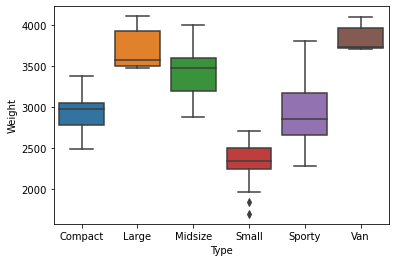

In [24]:
import seaborn as sb
sb.boxplot(C.Type,C.Weight)

<AxesSubplot:xlabel='Type', ylabel='Weight'>

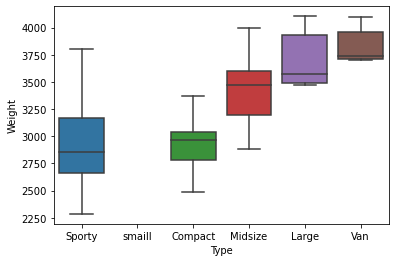

In [26]:
sb.boxplot(C.Type,C.Weight,order=["Sporty","smaill","Compact","Midsize","Large","Van"])

In [27]:
C

,Type,Weight
11,Compact,2490
73,Compact,2575
32,Compact,2690
77,Compact,2775
12,Compact,2785
...,...,...
55,Van,3735
86,Van,3785
88,Van,3960
16,Van,4025


# Countplot with Hue

In [30]:
A.AirBags = A.AirBags.fillna("Driver only")
B = A[["Type","AirBags"]]
C = B.sort_values(by=["Type","AirBags"])

In [31]:
C.head()

,Type,AirBags
20,Compact,Driver & Passenger
42,Compact,Driver & Passenger
2,Compact,Driver only
12,Compact,Driver only
24,Compact,Driver only


In [32]:
pd.crosstab(A.Type,A.AirBags)

AirBags,Driver & Passenger,Driver only,None
Type,,,
Compact,2,9,5
Large,3,8,0
Midsize,6,12,4
Small,0,5,16
Sporty,3,9,2
Van,0,3,6


<AxesSubplot:xlabel='Type', ylabel='count'>

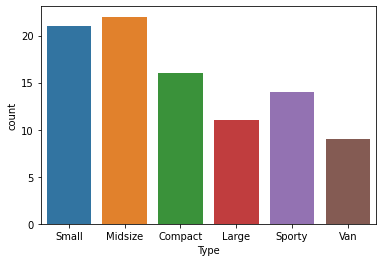

In [34]:
sb.countplot(A.Type)

<AxesSubplot:xlabel='Type', ylabel='count'>

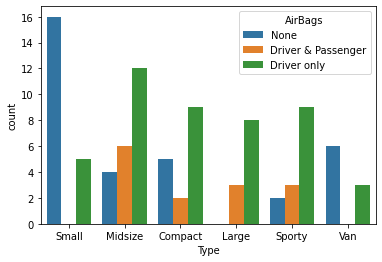

In [35]:
sb.countplot(A.Type,hue=A.AirBags)

In [36]:
A[A.Type=="Small"].groupby(by="AirBags")["id"].count()

AirBags
Driver only     5
None           16
Name: id, dtype: int64

In [37]:
A[A.Type=="Midsize"].groupby(by="AirBags")["id"].count()

AirBags
Driver & Passenger     6
Driver only           12
None                   4
Name: id, dtype: int64

# Missing Data Treatment

In [38]:
A.AirBags.value_counts()

Driver only           46
None                  33
Driver & Passenger    14
Name: AirBags, dtype: int64

In [39]:
type(A.AirBags.mode())

pandas.core.series.Series

In [40]:
A.AirBags.mode()

0    Driver only
dtype: object

In [42]:
q = A.AirBags.mode()
q[0]

'Driver only'

In [43]:
A.AirBags

0                   None
1     Driver & Passenger
2            Driver only
3            Driver only
4            Driver only
             ...        
88                  None
89                  None
90                  None
91           Driver only
92    Driver & Passenger
Name: AirBags, Length: 93, dtype: object

In [45]:
A.Price

0     15.9
1     33.9
2     29.1
3     37.7
4     30.0
      ... 
88    19.7
89    20.0
90    23.3
91    22.7
92    26.7
Name: Price, Length: 93, dtype: float64

In [46]:
A.Weight

0     2705
1     3560
2     3375
3     3405
4     3640
      ... 
88    3960
89    2985
90    2810
91    2985
92    3245
Name: Weight, Length: 93, dtype: int64

# Identify Missing Data

In [47]:
A=pd.read_csv("Cars93.csv")

In [48]:
A.isna()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
89,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
90,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
A.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [50]:
A['Rear.seat.room'].dtypes

dtype('float64')

In [52]:
x = A['Rear.seat.room'].mean()
A['Rear.seat.room'] = A['Rear.seat.room'].fillna(x)

In [54]:
A['Luggage.room'].dtypes

dtype('float64')

In [56]:
x = A['Luggage.room'].mean()
A['Luggage.room'] = A['Luggage.room'].fillna(x)

In [57]:
x

13.890243902439025

In [58]:
A.AirBags.dtypes

dtype('O')

In [59]:
x = A.AirBags.mode()[0]
A['AirBags'] = A['AirBags'].fillna(x)

In [61]:
x

'Driver only'

In [62]:
A.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64